# Problem Statement 
Your task for this homework will be to perform EDA (Exploratory Data Analysis) and predict if a person is prone to a heart attack (0 or 1) 

Question: Is this a classification or regression task and why?

<span style="color: green;">
    
This is a **classification task** since we are dealing with two possible outcomes, prone to heart attack and not prone to heart attack people. 

In [1]:
# first lets load the necessary libraries that we'll need for this assignment

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

### Step 1
#### Begin by importing the data and displaying the first 5 observations. 

In [2]:
# lets load the data
heart_df = pd.read_csv('data.csv')

# displaying the first 5 rows
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### **Answer the following using Pandas**

#### How many observations are there in total?

In [3]:
size_df = heart_df.shape[0]
print(f' There are {size_df} observations in total')

 There are 303 observations in total


#### Are there any missing values? 

In [4]:
# method 1: 
print(heart_df.isna().sum())

# # methods 2: 
# print(heart_df.isnull().any())


if not heart_df.isnull().values.any():
    print("No missing data")
else:
    missing_count = heart_df.isnull().sum().sum()
    print(f"There are {missing_count} observations missing")

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
No missing data


<span style="color: green;">
    
**No, there are is not any missing values.**

#### How many **unique** values are in each column?

In [5]:
# number of unique values in each column
# unique_values = heart_df.nunique()
# print(unique_values)

# display purposes
for col in heart_df.columns:
    unique_count = heart_df[col].nunique()
    print(f"In column {col} there are {unique_count} unique values.")

In column age there are 41 unique values.
In column sex there are 2 unique values.
In column cp there are 4 unique values.
In column trtbps there are 49 unique values.
In column chol there are 152 unique values.
In column fbs there are 2 unique values.
In column restecg there are 3 unique values.
In column thalachh there are 91 unique values.
In column exng there are 2 unique values.
In column oldpeak there are 40 unique values.
In column slp there are 3 unique values.
In column caa there are 5 unique values.
In column thall there are 4 unique values.
In column output there are 2 unique values.


#### Which columns will you treat as categorical, which will you take as continuous, and why?

In [6]:
print(heart_df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


<span style="color: green;">
    
**I will treat columns 'sex', 'cp', 'restecg', 'exng', and 'output'as categorical because these values are either 'female' or 'male', 'yes' or 'no' thus these columns can be treated as categorical  type. <br>
The rest I will treat as continous because they represent measurements or quantity of some observation.**

### Step 2

Create a plot of your target variable on the x-axis and counts on the y-axis.Create a plot of your target variable on the x-axis and counts on the y-axis.

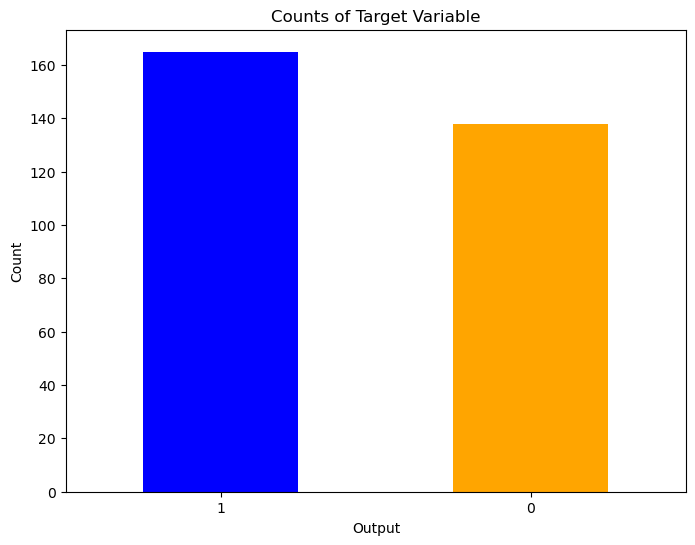

In [7]:
# Plot the counts of the target variable
plt.figure(figsize=(8, 6))
target_var = heart_df['output']

# ploting target variables 
target_var.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Output') # x-axis
plt.ylabel('Count') # y-axis 
plt.title('Counts of Target Variable')
plt.xticks(rotation=0)
plt.show()

#### Question: Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.

<span style="color: green;">

**The dataset seem to be balanced because there seem to be equal parts of people who are prone to heart attacks and the other portion that are not prone to them.**

#### Question: Is working with a balanced dataset important? Why or why not?

<span style = "color: green" >

Working with a balanced dataset ensures bias reduction in predictive models, which is crucial for improving accuracy and fairness. A balanced dataset helps models perform better by learning equally from all classes, thus **avoiding bias towards any one class**.

<br>
Another important reason for working with balanced datasets is the ease of diagnosing and understanding errors. **When all attributes are scaled and balanced, it becomes easier to pinpoint mistakes and improve the model based on specific issues**.

#### Question: How can we deal with an imbalanced dataset?

<span style = "color:green">

One common method is **class weighting**, which adjsut the weights of the class in the loss function.
<br> 

This technique handles imbalanced datasets by **assigning different weights to the classes** in the **loss function**. **This penalizes the misclassifications of the minority class more heavily than the ones made by the majority class**. 
<br> 
   
This **encourages the model to pay more attention** to the **minority class**, thereby improving its accuracy overall on future predictions. 

### Step 3

Create a count plot for each of your **categorical variables**. That is, the variable on the x-axis andcounts on the y-axis. Here’s an example of sex and slp:

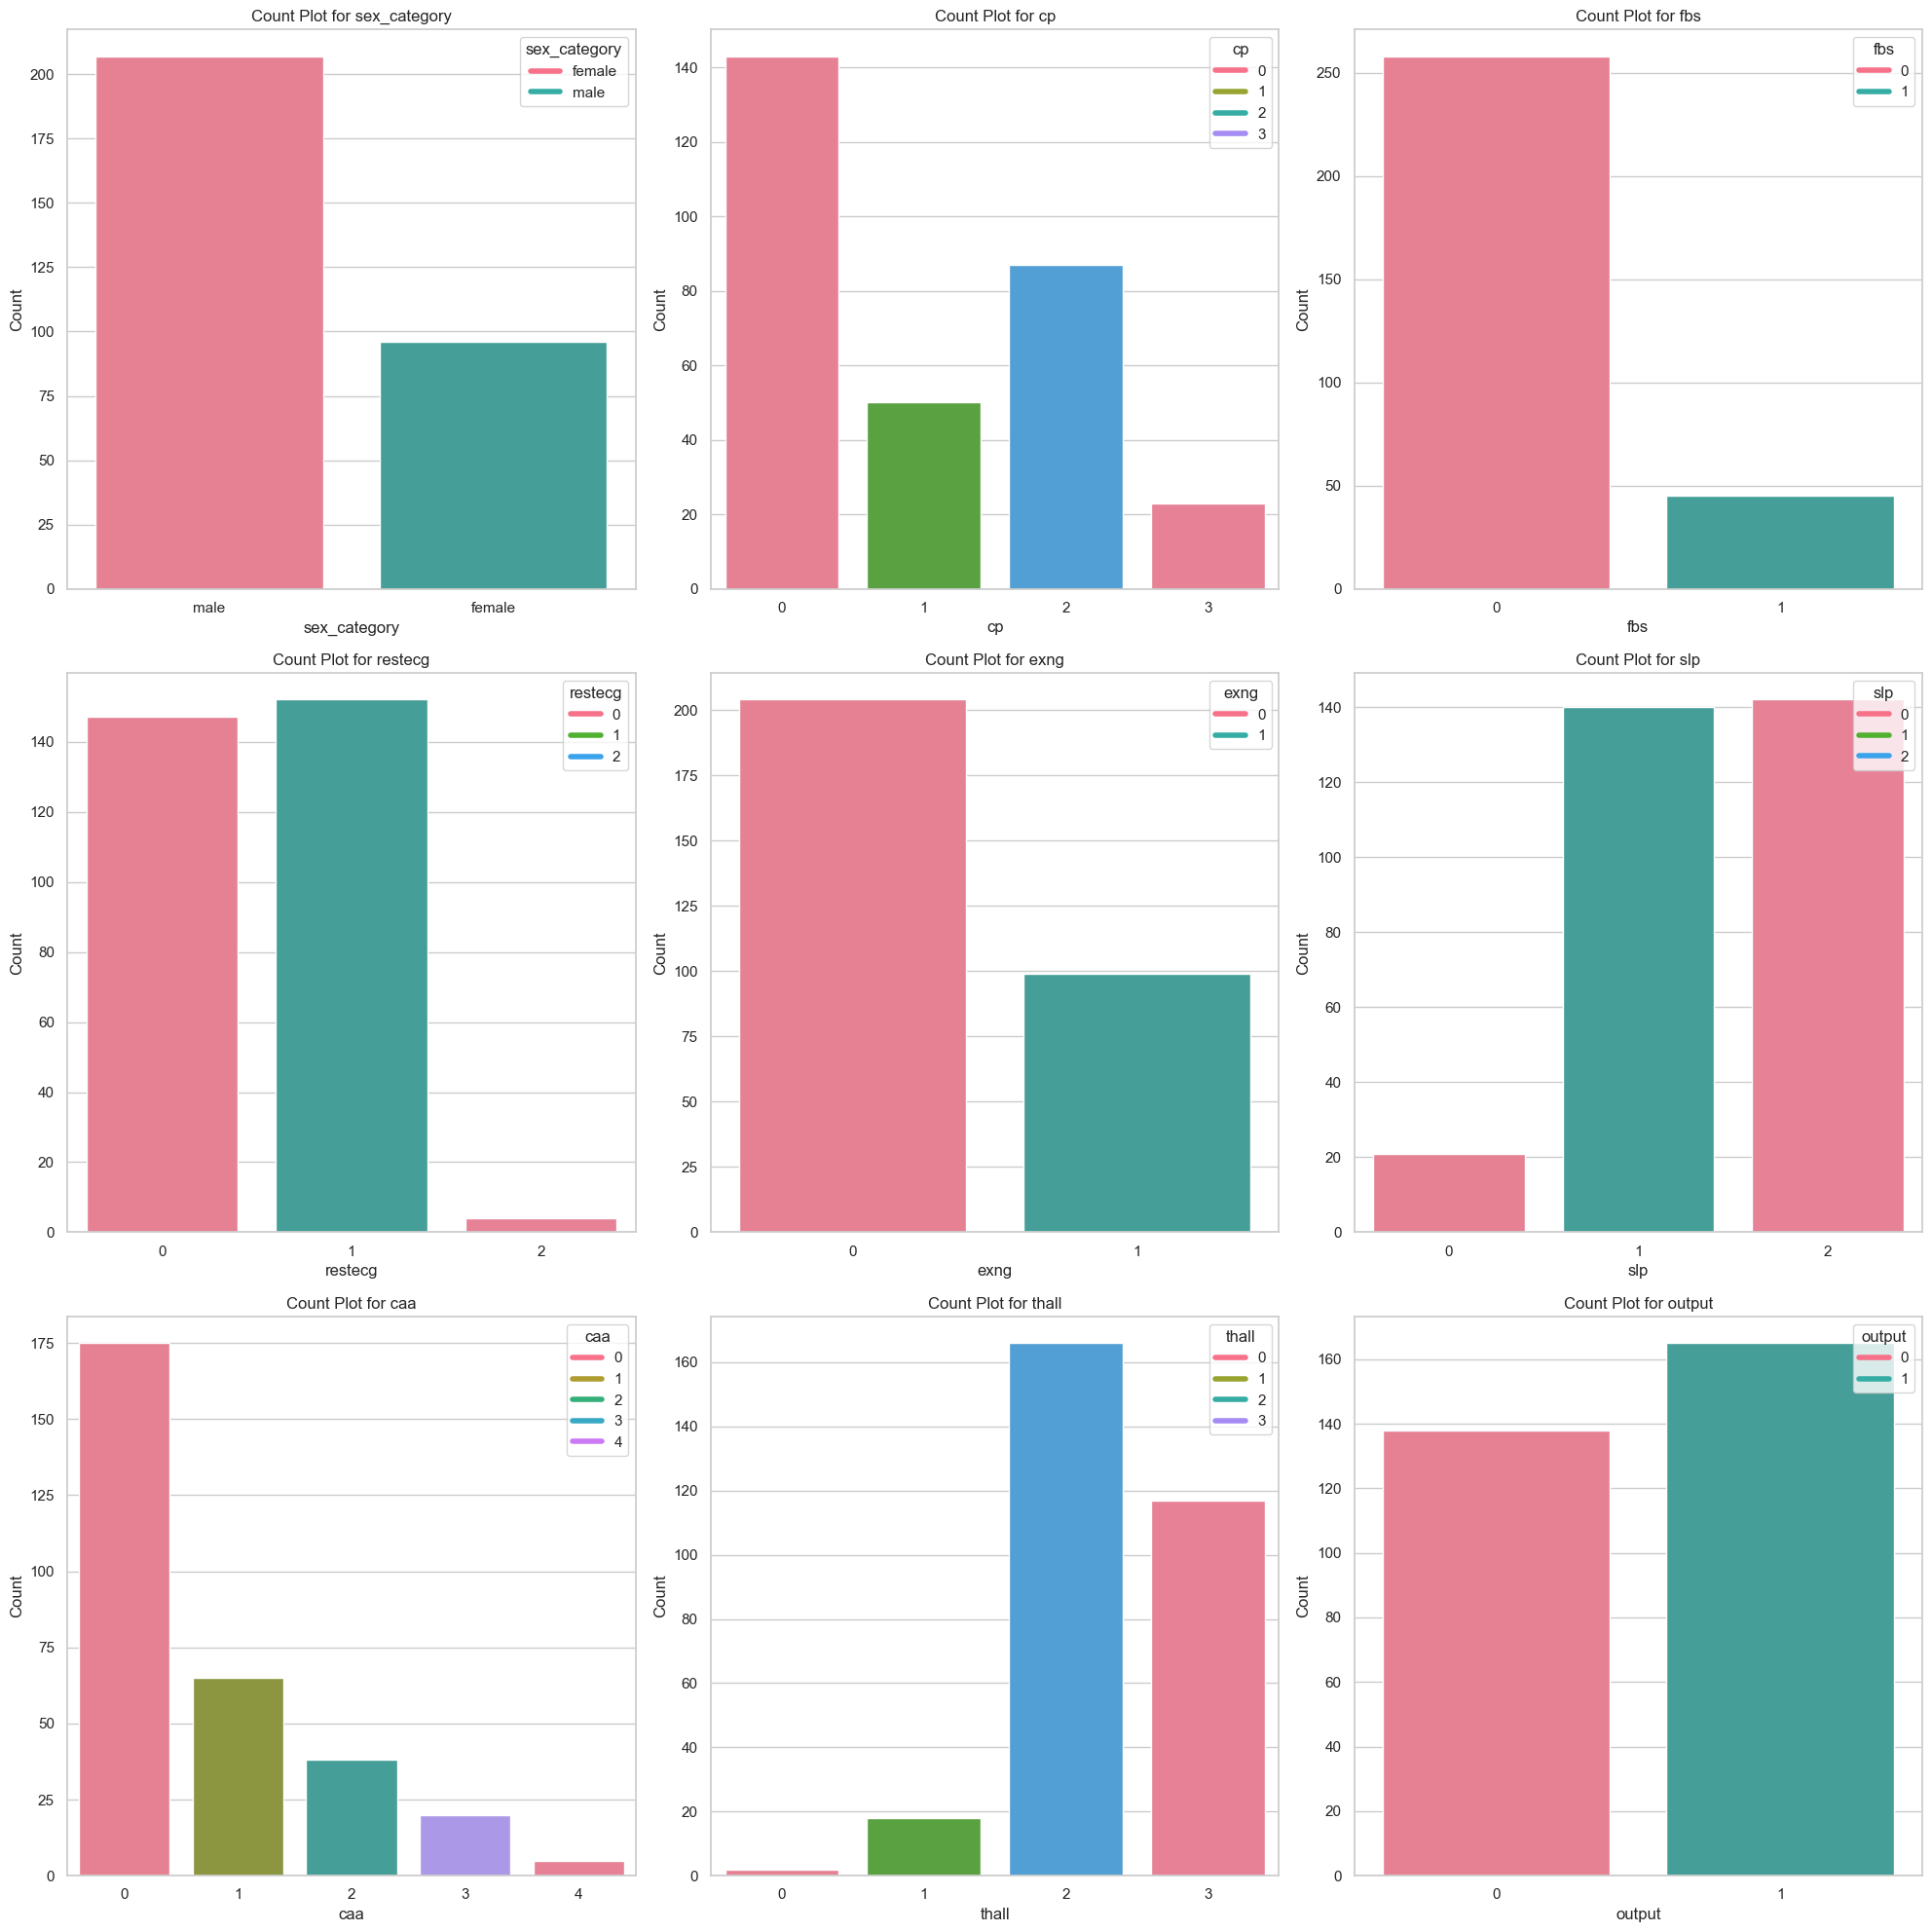

In [30]:
# Set the style for the plots
sb.set(style="whitegrid")

# Without modifying the original dataset, convert 0 & 1 to 'female' and 'male'
heart_df['sex_category'] = heart_df['sex'].replace({0: 'female', 1: 'male'})

# List of categorical variables
categorical_vars = ['sex_category', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Create a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

# Create count plots for each categorical variable
for i, var in enumerate(categorical_vars):
    sb.countplot(ax=axes[i], x=var, data=heart_df, palette="husl", hue=var, dodge=False, legend=False)
    axes[i].set_title(f'Count Plot for {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    
    # Adding legend
    unique_labels = sorted(heart_df[var].unique())
    handles = [plt.Line2D([0, 0], [0, 0], color=sb.color_palette("husl", len(unique_labels))[j], lw=4) 
               for j in range(len(unique_labels))]
    
    labels = unique_labels
    axes[i].legend(handles=handles, labels=labels, title=var, loc='upper right')

# Remove any unused subplots if the number of categorical variables is less than 9
for j in range(len(categorical_vars), 9):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Question: What can you conclude from the plots you created? Are there any interesting findings?

<span style = "color:green">
There are more males than there are females for this conduction. 
There is also distinguished difference between people who have fasting sugar and people who exercise induced angina with those that do not have either one these attributes. 
    
 <br> 
 
There seems to be some descending trend in for the plot that represents the number of major vessels. There are more count for 0 vessels and the count for these vessels decrease as we reach the last count for them.
    
<br> 
The output seem to have a balance ratio between '0' and '1'. Meaning that thre is an equal amount of people who are more prone to a heart attack than those who are not. 

### Step 4

Create box plots by outcome for each of your **continuous variables**. Here’s an example of age
and chol:

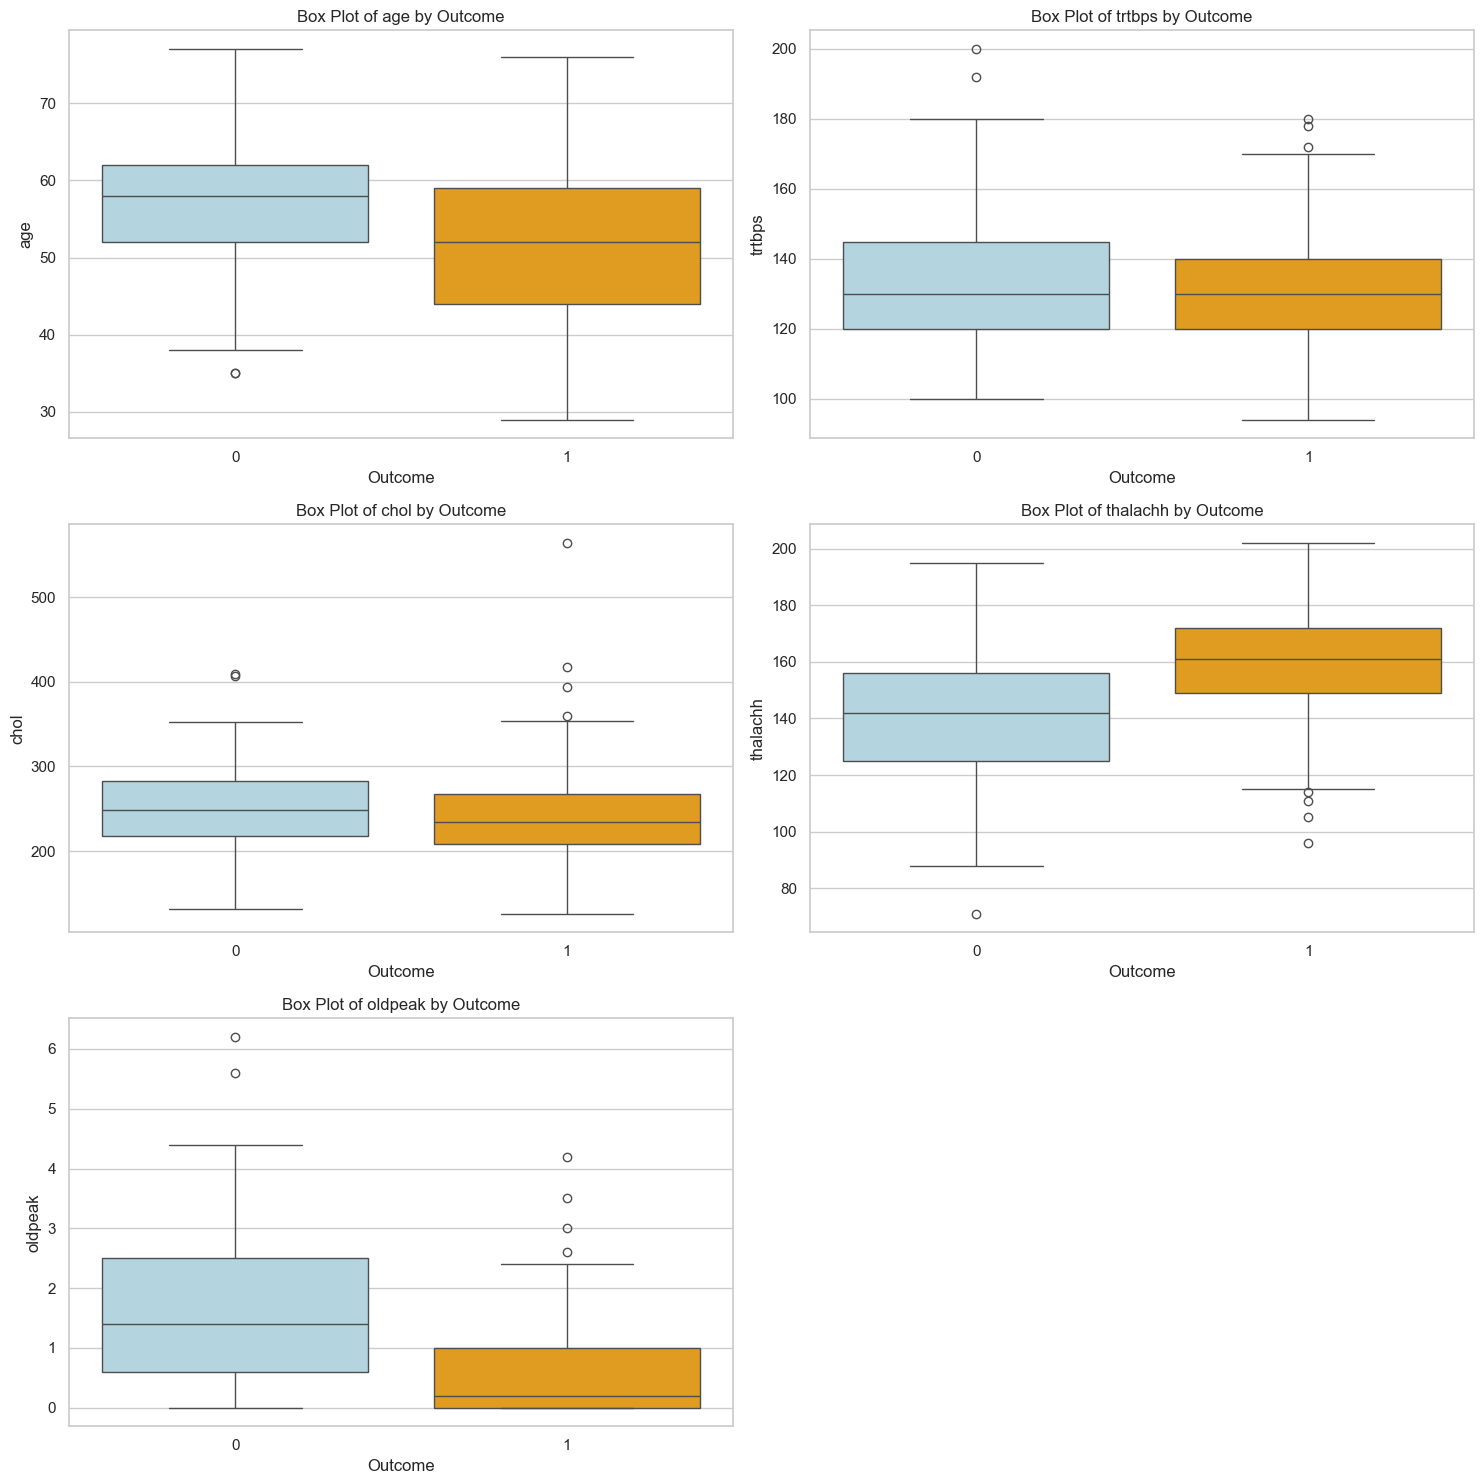

In [17]:
# List of continuous variables
continuous_variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Set up the matplotlib figure with a 3 by 2 grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Color palette
color_palette = ['lightblue', 'orange']

# Plot box plots for each continuous variable by outcome
for i, var in enumerate(continuous_variables):
    row, col = divmod(i, 2)
    sb.boxplot(x='output', y=var, data=heart_df, hue='output', palette=color_palette, ax=axes[row, col], legend=False)
    axes[row, col].set_title(f'Box Plot of {var} by Outcome')
    axes[row, col].set_xlabel('Outcome')
    axes[row, col].set_ylabel(var)

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Question: What can you conclude from the plots you created? Are there any interesting findings?

<span style = "color: green">

The average mean for people who are less prone to getting a heart attack than those are not have a large difference in their mean. People who are least likely of a heart attack have median of around 56 years of age and those who are prone have a median of 52 to 53 years of age. 

For this plot as well I can see that there is an equal amount of a few outliers on both the ends of the whiskers indicating that there are a few exceptions who are not within the range of the average mean to either be prone or not to be prone to getting a heart attack. 

<br> 

On the meanwhile the median value for both people who are prone and not prone to a heart attack have about the same median of roughly around 144. 

Resting blood pressure has significantly more outliers on the upper whisker of both the plots for those prone and not prone to a heart attack. This indicates that a couple people are less prone to a heart attack dispite having a high resting blood pressure. 



### Step 5

Create **distribution plots** by **outcome** for each of your continuous variables. Here’s an example
of trtbps and cp:

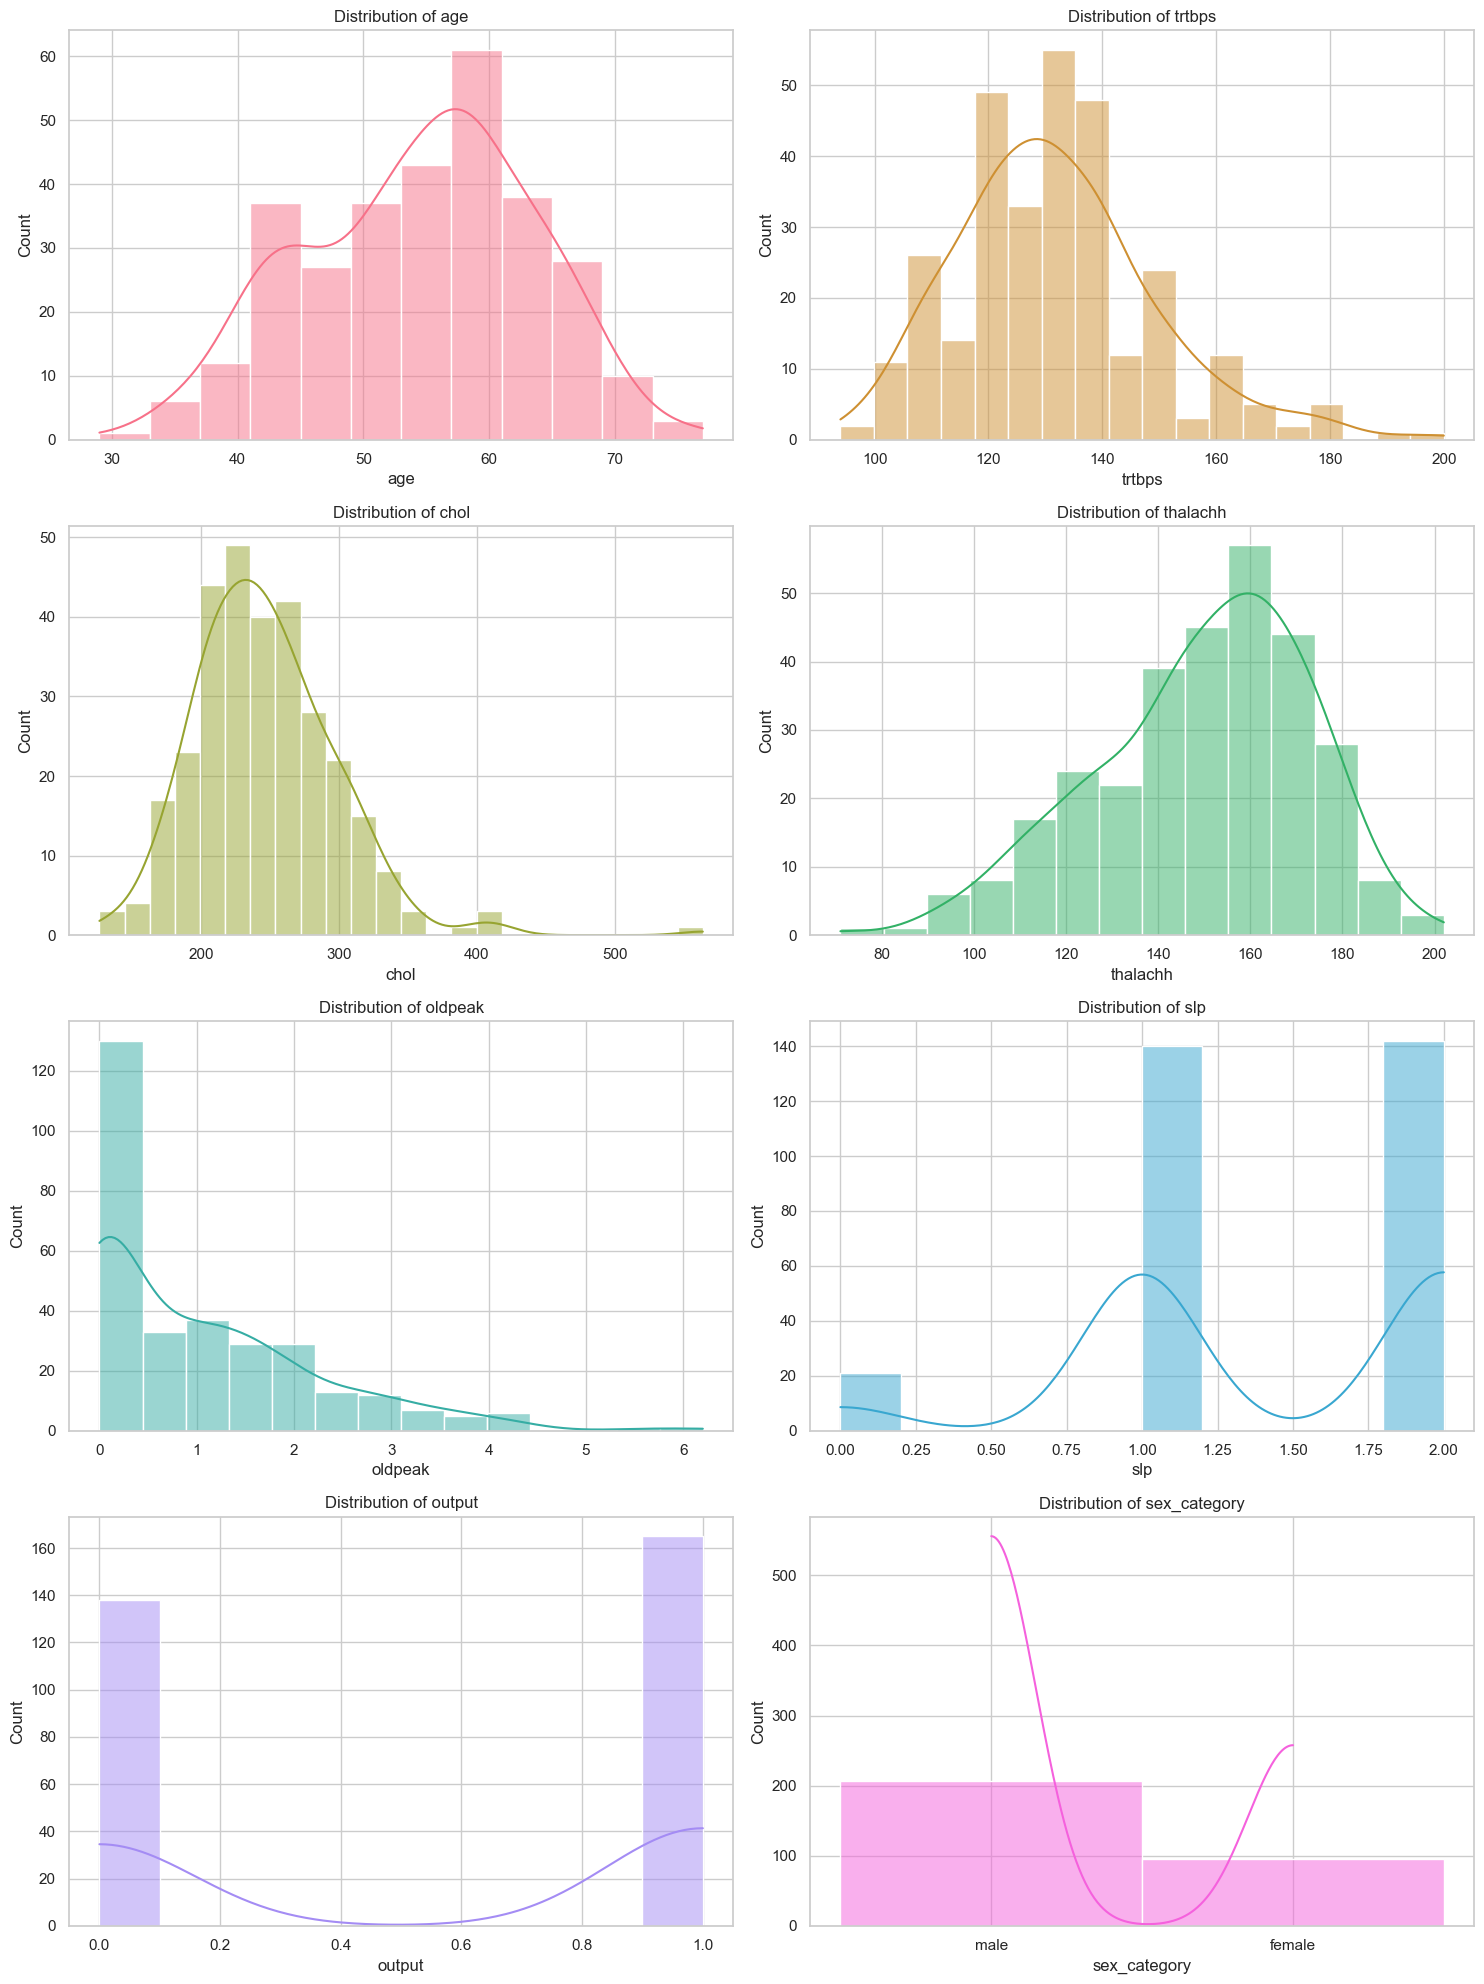

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

# List of all variables
all_variables = heart_df.columns.tolist()

# List of categorical variables
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall']

# Identify non-categorical variables
non_categorical_variables = [var for var in all_variables if var not in categorical_variables]

# Set up the matplotlib figure for histograms
fig, axes = plt.subplots(len(non_categorical_variables)//2, 2, figsize=(15, 20))

# Flatten axes for easier iteration
axes = axes.flatten()

# Define a color palette
color_palette = sb.color_palette("husl", len(non_categorical_variables))

# Plot histograms for each non-categorical variable
for i, var in enumerate(non_categorical_variables):
    sb.histplot(data=heart_df, x=var, kde=True, ax=axes[i], color=color_palette[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Question: What can you conclude from the plots you created? Are there any interesting findings?

<span styel = "color = green">

 There seem to be 

### Step 6 

Create a heatmap of your data. Here’s an example:

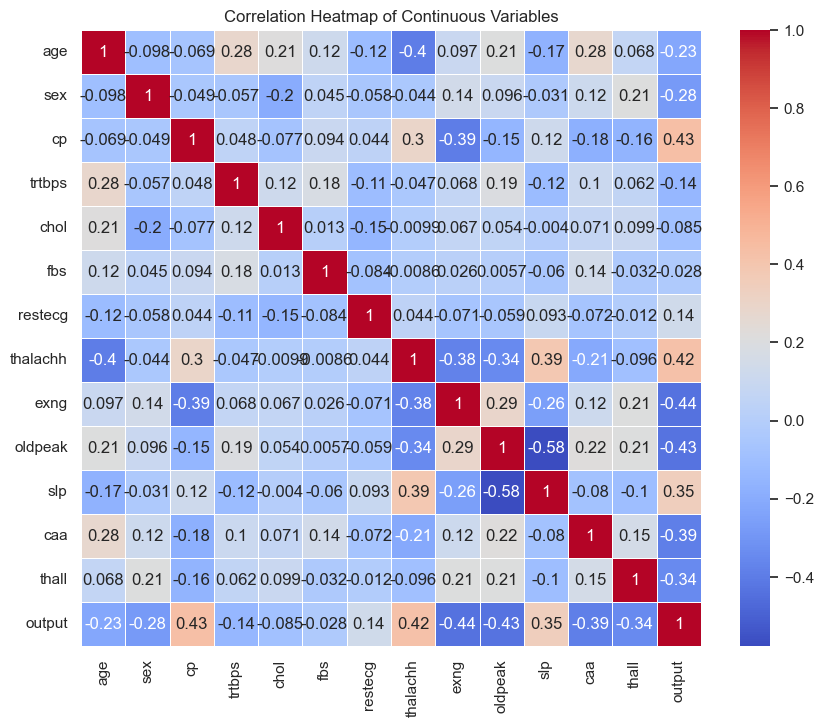

In [19]:
# Compute the correlation matrix
corr_matrix = heart_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
sb.heatmap(corr_matrix, annot=True,  cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Continuous Variables')

# Show plot
plt.show()

In [21]:
# # Generate the pairs plot
# sb.pairplot(heart_df, diag_kind='kde', hue='output', palette='husl')

# # Show the plot
# plt.show()

#### Question: What can you conclude from the heatmap you created? Are there any interesting findings? 

In [12]:
Most of the predictors have a weak correlation with each other, this indicates that the  

hello


### Step 7

Explore the data a bit on your own and include a few additional graphs of your choice. For
example, here’s a line plot of cp vs. age:

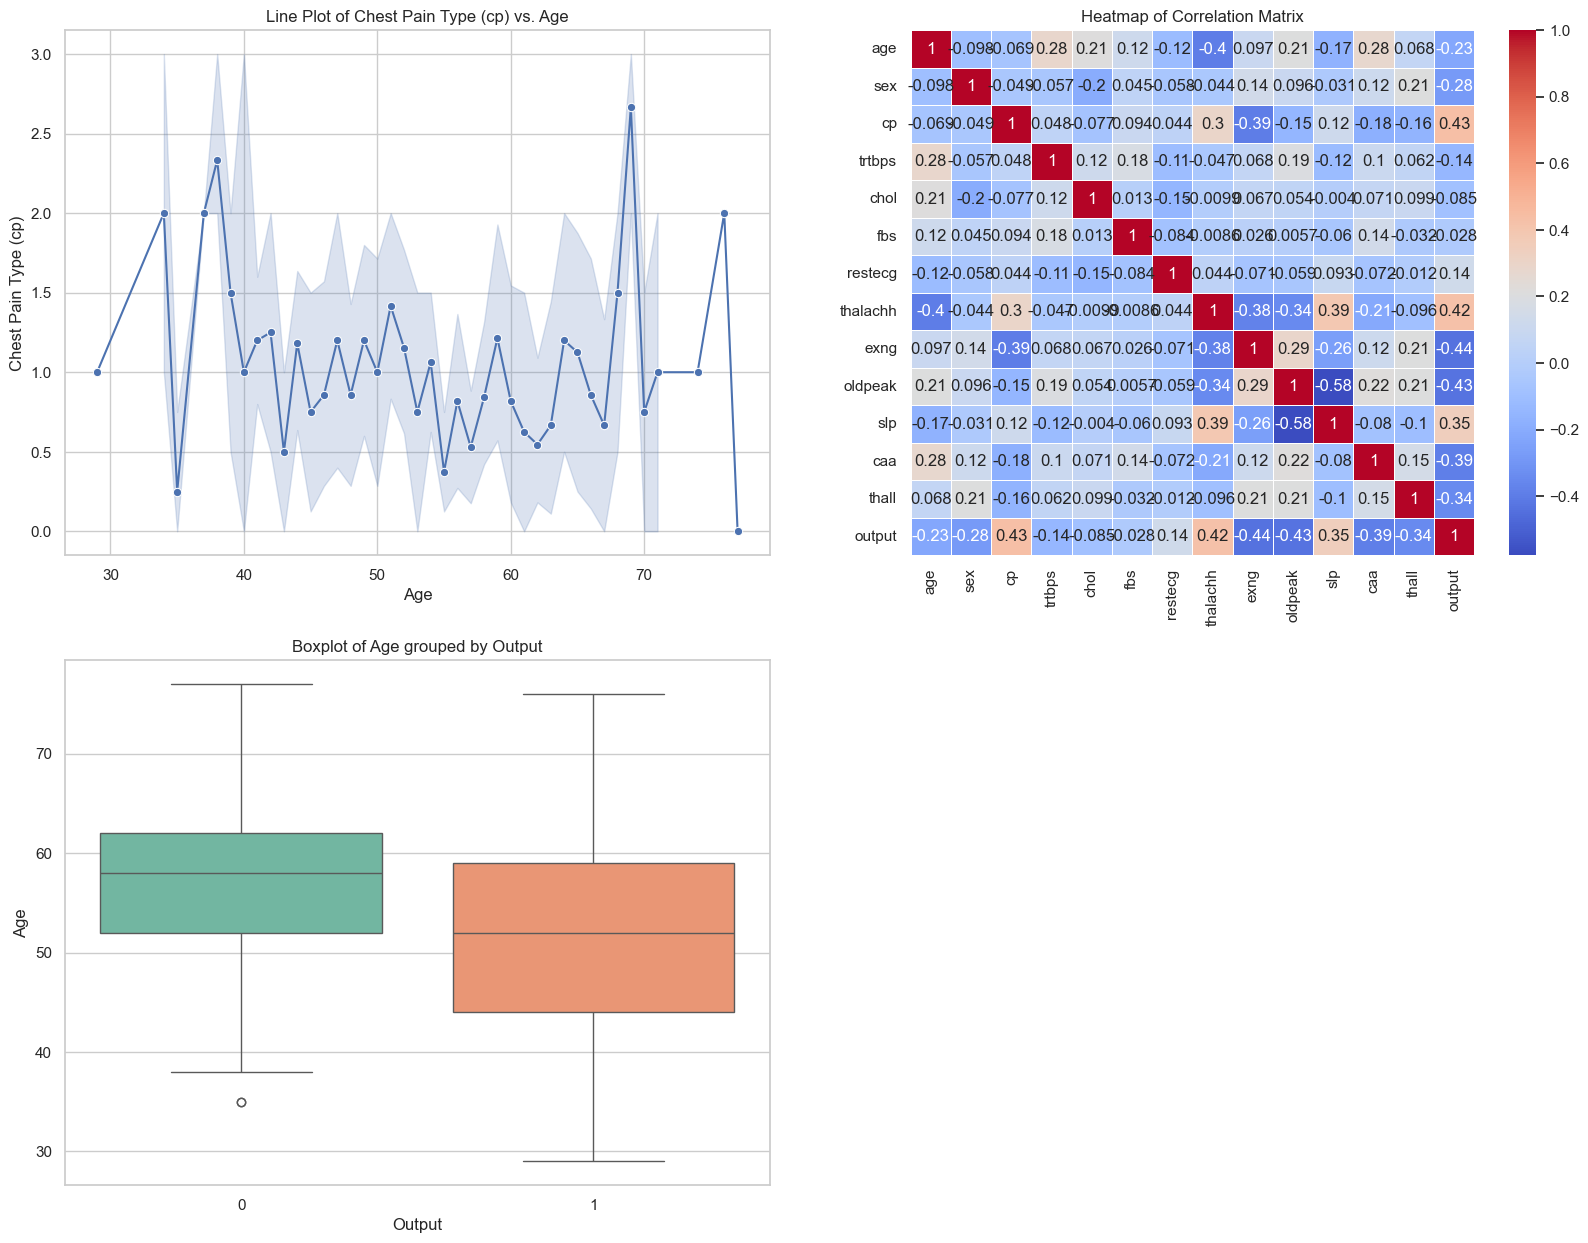

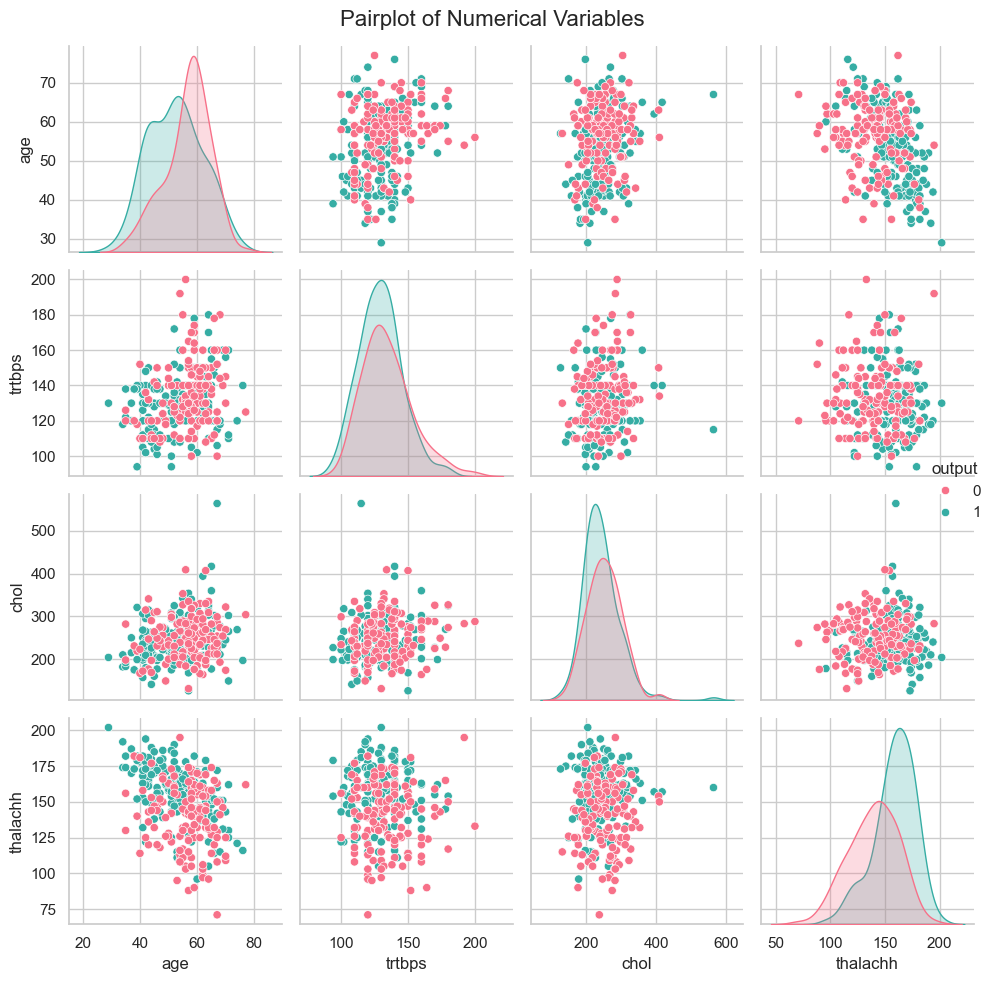

In [28]:
# Ensure all necessary imports are made
from pandas.api.types import is_numeric_dtype

# Set the style for the plots
sb.set(style="whitegrid")

# Create a figure and a 2x2 grid
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Plot 1: Line plot of cp vs. age
ax1 = fig.add_subplot(gs[0, 0])
sb.lineplot(ax=ax1, x='age', y='cp', data=heart_df, marker='o')
ax1.set_title('Line Plot of Chest Pain Type (cp) vs. Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Chest Pain Type (cp)')

# Plot 2: Heatmap of the correlation matrix
numeric_df = heart_df.select_dtypes(include=[float, int])  # Select only numeric columns
ax2 = fig.add_subplot(gs[0, 1])
correlation_matrix = numeric_df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax2)
ax2.set_title('Heatmap of Correlation Matrix')

# Plot 3: Boxplot of age grouped by output
ax3 = fig.add_subplot(gs[1, 0])
sb.boxplot(ax=ax3, x='output', y='age', data=heart_df, hue='output', palette="Set2", legend=False)
ax3.set_title('Boxplot of Age grouped by Output')
ax3.set_xlabel('Output')
ax3.set_ylabel('Age')

# Plot 4: Pairplot to see relationships between some numerical variables
pairplot_fig = sb.pairplot(heart_df, vars=['age', 'trtbps', 'chol', 'thalachh'], hue='output', palette="husl")
pairplot_fig.fig.set_size_inches(10, 10)
pairplot_fig.fig.subplots_adjust(top=0.9)  # Adjust space at the top for the title
pairplot_fig.fig.suptitle('Pairplot of Numerical Variables', fontsize=16)  # Add title

# Show the 2x2 grid
plt.tight_layout()
plt.show()

#### Question: What can you conclude from the plots that you created? Did you find anything interesting?

### Step 8

#### Question: Name two different models that you can use to solve the problem statement.

In [ ]:
Two models that we can use 

 #### Question: What is the difference between label encoding and one hot encoding, and when should you use one over the other?

<span style = "color:green">

**Label encoding** assigns a unique integer to individual categorical variables. Label encoding assumes inherent order within the categories. Label encoding is best suited for **ordinal categorical** variables such as 0 - small, 1 - medium, 2 - large, 3 - x-large since order matters. 
<br>  
    
**One hot encoding** converts categorical variables into a series of binary vectors. Each of the category is distinguished by pattern made up by 1s and 0s. This approach assumes no inherent order within the categorical variables. Best suited for **nominal variables** for example, [0, 0, 0] - red, [1, 0, 0] - blue, [0, 1, 0] - green, [0, 0, 1] - yellow this variables are not inherently related to each other. 


#### Question: What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data?

<span style="color:green">
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other.

<br>
    
The reason we care about multicollinearity is that it can bring redundancy to the model training process, making it difficult to determine the individual effect of each predictor on the dependent variable. This can lead to unreliable and unstable coefficient estimates.

<br>
    
We can use the pairplot function in the Seaborn library to visualize the relationships between predictors. The pair plot makes it easier to view the correlation between every pair of predictors, helping to identify potential multicollinearity issues.


#### Question: Why is scaling data important?

<span style = "color : green">
   It prevents features with larger magnitudes from dominating the learning process, enhances the interpretability of model coefficients, and mitigates numerical instability issues. Algorithms like KNN, SVM, and neural networks, which rely on distance measures, particularly benefit from scaling.     
<br>
    
Common techniques such as standardization, min-max scaling, robust scaling, and log transformation adapt the data to a consistent scale, facilitating more accurate and reliable model training and prediction.

#### Question: For the two different models that you named earlier, are they using a parametric or non- parametric learning algorithms? What’s the difference?

#### Question: Suppose that we had missing values in our dataset. What are different ways we could handle them?

### Step 9

Choose 2 different models to solve the problem statement. Apply any necessary encoding,
scaling, and train test splits to your data and construct the 2 models you selected. Provide
a classification report and confusion matrix for both models. 

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume heart_df is already loaded and available
# Example: heart_df = pd.read_csv('path_to_heart_disease_dataset.csv')

# Convert 'sex' to a categorical variable for this example
heart_df['sex_category'] = heart_df['sex'].replace({0: 'female', 1: 'male'})

# Prepare the data
X = heart_df.drop('output', axis=1)  # Features except the target
y = heart_df['output']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
models = {
    'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                           ('classifier', LogisticRegression())]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', GradientBoostingClassifier())])
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Gradient Boosting Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



#### Do the following 
##### Write a conclusion (~1 paragraph) detailing the main points you discovered while exploring the data. Also include things like: Did you scale your data? If so, which scaling method did you use and why? Is there a specific reason you selected these 2 models? How did the 2 models compare against each other? 

Note: Be sure to use cross validation when comparing models. See sklearn’s
cross_val_score if you’re stuck.

In [ ]:
cross validation 